# DK52 Alignment Experiment
Bili Dong 2020-10-28

- [Introduction](#Introduction)
- [Source Data](#Source-Data)
- [Output Data](#Output-Data)
- [Manual Transformation](#Manual-Transformation)
    - [Output Point Set Comparison](#Output-Point-Set-Comparison)
    - [Source Point Set Comparison](#Source-Point-Set-Comparison)

In [1]:
import sys
from pathlib import Path

PIPELINE_ROOT = Path('.').absolute().parent
sys.path.append(PIPELINE_ROOT.as_posix())

## Introduction

In this experiment, I tried to verify the transformation matrix from [DK52 Aligned for projections 5], but found an inconsistent result. I haven't figured out the causes yet, but I suspect the issue is in the coordinate transformation.

[DK52 Aligned for projections 5]: https://activebrainatlas.ucsd.edu/ng/?id=188&#!{%22dimensions%22:{%22x%22:[3.25e-7,%22m%22],%22y%22:[3.25e-7,%22m%22],%22z%22:[0.00002,%22m%22]},%22position%22:[42892.5,22238.5,251.5],%22crossSectionScale%22:14.240847721792429,%22crossSectionDepth%22:-3.678794411714423,%22projectionOrientation%22:[0.5623210072517395,-0.2938638925552368,-0.6760111451148987,0.37476402521133423],%22projectionScale%22:22643.530714632085,%22layers%22:[{%22type%22:%22image%22,%22source%22:%22precomputed://https://activebrainatlas.ucsd.edu/data/DK52/neuroglancer_data/C1%22,%22tab%22:%22source%22,%22shader%22:%22#uicontrol%20float%20min%20slider(min=0,%20max=1,%20default=0)\n#uicontrol%20float%20max%20slider(min=0,%20max=1,%20default=1)\n#uicontrol%20float%20invert%20slider(min=0,%20max=1,%20default=0,%20step=1)\n#uicontrol%20float%20brightness%20slider(min=-1,%20max=1)\n#uicontrol%20float%20contrast%20slider(min=-3,%20max=3,%20step=0.01)\n#uicontrol%20float%20gamma%20slider(min=0.05,%20max=2.5,%20default=1,%20step=0.05)\n#uicontrol%20float%20linlog%20slider(min=0,%20max=1,%20default=0,%20step=1)\n\n%20%20void%20main()%20{\n%20%20%20%20float%20limit%20=%2040000.0;\n%20%20%20%20float%20pix%20=%20float(toRaw(getDataValue()));\n\n%20%20%20%20if%20(linlog==1.0)%20{\n%20%20%20%20\tpix%20=%20log(pix);\n%20%20%20%20%20%20\tlimit%20=%2010.0;\n%20%20%20%20}%20else%20{\n%20%20%20%20pix%20=%20pow(pix,gamma);\n%20%20%20%20limit%20=%2040000.0;\n%20%20%20%20}\n\n\n%20%20%20%20float%20pix_val%20=%20pix/limit;\n%20%20\tif(pix_val%20%3C%20min){\n%20%20\t\tpix_val%20=%200.0;\n%20%20\t}\n%20%20\tif(pix_val%20%3E%20max){\n%20%20%20%20\tpix_val%20=%201.0;\n%20%20\t}\n\n\n%20%20\tif(invert==1.0){\n%20%20\t%20%20emitGrayscale((1.0%20-(%20pix_val%20%20-%20brightness))%20*%20exp(contrast))%20;\n%20%20\t}\n%20%20\telse{\n%20%20%20%20\temitGrayscale((pix_val%20+%20brightness)%20*\n%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20exp(contrast));\n%20%20\t}\n\n}\n%22,%22shaderControls%22:{%22brightness%22:0.06,%22contrast%22:0.76,%22gamma%22:0.95},%22name%22:%22C1%22},{%22type%22:%22image%22,%22source%22:%22precomputed://https://activebrainatlas.ucsd.edu/data/DK52/neuroglancer_data/C2%22,%22tab%22:%22source%22,%22shader%22:%22#uicontrol%20float%20min%20slider(min=0,%20max=1,%20default=0)\n#uicontrol%20float%20max%20slider(min=0,%20max=1,%20default=1)\n#uicontrol%20float%20invert%20slider(min=0,%20max=1,%20default=0,%20step=1)\n#uicontrol%20float%20brightness%20slider(min=-1,%20max=1)\n#uicontrol%20float%20contrast%20slider(min=-3,%20max=3,%20step=0.01)\nvoid%20main()%20{\n%20%20float%20limit%20=%2040000.0;\n%20%20\n%20%20float%20pix_val%20=%20float(toRaw(getDataValue()));\n%20%20pix_val%20=%20pix_val%20/%20limit;\n%20%20if(pix_val%20%3C%20min){\n%20%20\tpix_val%20=%200.0;\n%20%20}\n%20%20if(pix_val%20%3E%20max){\n%20%20%20%20pix_val%20=%201.0;\n%20%20}\n\n%20%20if(invert==1.0){\n\n%20%20\t%20%20emitRGB(vec3((1.0%20-(pix_val%20-%20brightness))%20*\n%20%20%20%20%20%20%20exp(contrast),0,0));\n%20%20}\n%20%20else{\n%20%20%20%20emitRGB(vec3((pix_val%20+%20brightness)%20*\n%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20exp(contrast),0,0));\n%20%20}\n\n}\n%22,%22shaderControls%22:{%22brightness%22:0.04,%22contrast%22:1.83},%22name%22:%22C2%22,%22visible%22:false},{%22type%22:%22image%22,%22source%22:%22precomputed://https://activebrainatlas.ucsd.edu/data/DK52/neuroglancer_data/C3%22,%22tab%22:%22annotations%22,%22shader%22:%22#uicontrol%20float%20min%20slider(min=0,%20max=1,%20default=0)\n#uicontrol%20float%20max%20slider(min=0,%20max=1,%20default=1)\n#uicontrol%20float%20invert%20slider(min=0,%20max=1,%20default=0,%20step=1)\n#uicontrol%20float%20brightness%20slider(min=-1,%20max=1)\n#uicontrol%20float%20contrast%20slider(min=-3,%20max=3,%20step=0.01)\nvoid%20main()%20{\n%20%20float%20limit%20=%2040000.0;\n%20%20\n%20%20float%20pix_val%20=%20float(toRaw(getDataValue()));\n%20%20pix_val%20=%20pix_val%20/%20limit;\n%20%20if(pix_val%20%3C%20min){\n%20%20\tpix_val%20=%200.0;\n%20%20}\n%20%20if(pix_val%20%3E%20max){\n%20%20%20%20pix_val%20=%201.0;\n%20%20}\n\n%20%20if(invert==1.0){\n\n%20%20\t%20%20emitRGB(vec3(0,(1.0%20-(pix_val%20-%20brightness))%20*\n%20%20%20%20%20%20%20exp(contrast),0));\n%20%20}\n%20%20else{\n%20%20%20%20emitRGB(vec3(0,(pix_val%20+%20brightness)%20*\n%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20exp(contrast),0));\n%20%20}\n\n}\n%22,%22shaderControls%22:{%22brightness%22:0.04,%22contrast%22:1.92},%22name%22:%22C3%22},{%22type%22:%22segmentation%22,%22source%22:{%22url%22:%22precomputed://https://activebrainatlas.ucsd.edu/data/structures/atlasV7%22,%22transform%22:{%22matrix%22:[[0.8879282700452737,0.5297064165901834,-0.0656862661295595,18309.0995011312],[-0.35874630775873184,1.3064870877277086,0.047808994348642005,3239.384824729],[0.06696621479436028,-0.024547949485823613,1.1270756915581706,53.29533787371052]],%22outputDimensions%22:{%22x%22:[3.25e-7,%22m%22],%22y%22:[3.25e-7,%22m%22],%22z%22:[0.00002,%22m%22]},%22operations%22:[0.007841571972656248,0.0009349309509277346,0.0016592251586914056,-1,-4,-22,0.96,1.4100000000000004,1.1300000000000001,0.00003,0.000005,0.5,5,0.01,0.1]}},%22tab%22:%22source%22,%22segments%22:[%221%22,%2210%22,%2211%22,%2212%22,%2213%22,%2214%22,%2215%22,%2216%22,%2217%22,%2218%22,%2219%22,%222%22,%2220%22,%2221%22,%2222%22,%2223%22,%2224%22,%2225%22,%2226%22,%2227%22,%2228%22,%223%22,%224%22,%225%22,%226%22,%227%22,%228%22,%229%22],%22name%22:%22annotations%22}],%22selectedLayer%22:{%22layer%22:%22annotations%22,%22visible%22:true,%22size%22:426.207275390625},%22layout%22:%22xy%22}

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from utilities.sqlcontroller import SqlController

animal = 'DK52'

sql_controller = SqlController(animal)

Connecting dklab@db.dk.ucsd.edu:3306


## Source Data

The source data are the atlas structure of the foundation brains. We load structures' origins and volumes from files, and then estimate their centers.

In [3]:
from scipy import ndimage

from utilities.utilities_cvat_neuroglancer import get_structure_number

def load_atlas_data():
    atlas_dir = Path('/net/birdstore/Active_Atlas_Data/data_root/atlas_data/atlasV7')
    origin_dir = atlas_dir / 'origin'
    volume_dir = atlas_dir / 'structure'
    
    atlas_data = {}
    
    for origin_file, volume_file in zip(sorted(origin_dir.iterdir()), sorted(volume_dir.iterdir())):
        name = origin_file.stem
        if name != volume_file.stem:
            print(f'Error! {origin_file.name} and {volume_file.name} are not compatible!')
            break
            
        origin = np.loadtxt(origin_file)
        
        volume = np.load(volume_file)
        volume = np.rot90(volume, axes=(0, 1))
        volume = np.flip(volume, axis=0)
        
        atlas_data[name] = (origin, volume)
        
    return atlas_data

def estimate_structure_centers(atlas_data, animal):
    pipeline_data_dir = Path('/net/birdstore/Active_Atlas_Data/data_root/pipeline_data')
    thumbnail_dir = pipeline_data_dir / animal / 'preps/CH1/thumbnail'
    
    # Compute box center
    print(f'resolution: {sql_controller.scan_run.resolution}')
    print(f'width: {sql_controller.scan_run.width}')
    print(f'height: {sql_controller.scan_run.height}')
    box_w = sql_controller.scan_run.width * sql_controller.scan_run.resolution / 10  # 10 mum scale
    box_h = sql_controller.scan_run.height * sql_controller.scan_run.resolution / 10  # 10 mum scale
    box_z = len(list(thumbnail_dir.iterdir()))  # 20 mum scale
    box_center = np.array([box_w, box_h, box_z]) / 2
    print(f'box center: {box_center}')
    
    # From the neuroglancer righ panel, I would expect the following:
    # box_center = np.array([1000, 1000, 300]) / 2

    # Estimate structure volume center of mass
    atlas_com = {}
    for name, (origin, volume) in atlas_data.items():
        sx, sy, sz = volume.shape
        grid_com = np.array([sx, sy, (sz + 1) / 2]) / 2  # Why (sz + 1) instead of sz?
        # I'm considering an alternative way to compute com like the following:
        # grid_com = np.array(ndimage.measurements.center_of_mass(volume))
        # grid_com[2] /= 2
        atlas_com[name] = box_center + origin + grid_com
    return atlas_com

atlas_data = load_atlas_data()
source_centers = estimate_structure_centers(atlas_data, animal)
source_centers

resolution: 0.325
width: 65000
height: 36000
box center: [1056.25  585.    243.  ]


{'10N_L': array([1269.06074091,  648.23146956,  201.35771155]),
 '10N_R': array([1269.06074091,  648.23146956,  259.64228845]),
 '12N': array([1260.05026858,  655.12536632,  220.75      ]),
 '3N_L': array([922.16706935, 478.31481492, 217.30805959]),
 '3N_R': array([922.16706935, 478.31481492, 244.19194041]),
 '4N_L': array([956.11454699, 482.93515455, 213.91315946]),
 '4N_R': array([956.11454699, 482.93515455, 263.08684054]),
 '5N_L': array([1010.78141394,  587.58009809,   91.75519758]),
 '5N_R': array([1010.78141394,  587.58009809,  366.24480242]),
 '6N_L': array([1072.1760463 ,  597.03141451,  200.71336845]),
 '6N_R': array([1072.1760463 ,  597.03141451,  273.78663155]),
 '7N_L': array([1088.27028024,  705.01534472,  104.10451566]),
 '7N_R': array([1088.27028024,  705.01534472,  336.39548434]),
 '7n_L': array([1049.29059535,  631.93840451,  102.67633749]),
 '7n_R': array([1049.29059535,  631.93840451,  309.82366251]),
 'AP': array([1259.15888976,  613.03375035,  235.        ]),
 'Amb

## Output Data

The output data are gotten by manually annotating the structures. I got those data from Ed.

In [4]:
# DK52 structure centers
output_centers = {
    '12N': [46488, 18778, 242],
    '5N_L': [38990, 20019, 172],
    '5N_R': [39184, 19027, 315],
    '7N_L': [42425, 23190, 166],
    '7N_R': [42286, 22901, 291]
}

## Manual Transformation

Now let's take the transformation matrix from [DK52 Aligned for projections 5] and see if they indeed transform the source point set to the output point set.

[DK52 Aligned for projections 5]: https://activebrainatlas.ucsd.edu/ng/?id=188&#!{%22dimensions%22:{%22x%22:[3.25e-7,%22m%22],%22y%22:[3.25e-7,%22m%22],%22z%22:[0.00002,%22m%22]},%22position%22:[42892.5,22238.5,251.5],%22crossSectionScale%22:14.240847721792429,%22crossSectionDepth%22:-3.678794411714423,%22projectionOrientation%22:[0.5623210072517395,-0.2938638925552368,-0.6760111451148987,0.37476402521133423],%22projectionScale%22:22643.530714632085,%22layers%22:[{%22type%22:%22image%22,%22source%22:%22precomputed://https://activebrainatlas.ucsd.edu/data/DK52/neuroglancer_data/C1%22,%22tab%22:%22source%22,%22shader%22:%22#uicontrol%20float%20min%20slider(min=0,%20max=1,%20default=0)\n#uicontrol%20float%20max%20slider(min=0,%20max=1,%20default=1)\n#uicontrol%20float%20invert%20slider(min=0,%20max=1,%20default=0,%20step=1)\n#uicontrol%20float%20brightness%20slider(min=-1,%20max=1)\n#uicontrol%20float%20contrast%20slider(min=-3,%20max=3,%20step=0.01)\n#uicontrol%20float%20gamma%20slider(min=0.05,%20max=2.5,%20default=1,%20step=0.05)\n#uicontrol%20float%20linlog%20slider(min=0,%20max=1,%20default=0,%20step=1)\n\n%20%20void%20main()%20{\n%20%20%20%20float%20limit%20=%2040000.0;\n%20%20%20%20float%20pix%20=%20float(toRaw(getDataValue()));\n\n%20%20%20%20if%20(linlog==1.0)%20{\n%20%20%20%20\tpix%20=%20log(pix);\n%20%20%20%20%20%20\tlimit%20=%2010.0;\n%20%20%20%20}%20else%20{\n%20%20%20%20pix%20=%20pow(pix,gamma);\n%20%20%20%20limit%20=%2040000.0;\n%20%20%20%20}\n\n\n%20%20%20%20float%20pix_val%20=%20pix/limit;\n%20%20\tif(pix_val%20%3C%20min){\n%20%20\t\tpix_val%20=%200.0;\n%20%20\t}\n%20%20\tif(pix_val%20%3E%20max){\n%20%20%20%20\tpix_val%20=%201.0;\n%20%20\t}\n\n\n%20%20\tif(invert==1.0){\n%20%20\t%20%20emitGrayscale((1.0%20-(%20pix_val%20%20-%20brightness))%20*%20exp(contrast))%20;\n%20%20\t}\n%20%20\telse{\n%20%20%20%20\temitGrayscale((pix_val%20+%20brightness)%20*\n%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20exp(contrast));\n%20%20\t}\n\n}\n%22,%22shaderControls%22:{%22brightness%22:0.06,%22contrast%22:0.76,%22gamma%22:0.95},%22name%22:%22C1%22},{%22type%22:%22image%22,%22source%22:%22precomputed://https://activebrainatlas.ucsd.edu/data/DK52/neuroglancer_data/C2%22,%22tab%22:%22source%22,%22shader%22:%22#uicontrol%20float%20min%20slider(min=0,%20max=1,%20default=0)\n#uicontrol%20float%20max%20slider(min=0,%20max=1,%20default=1)\n#uicontrol%20float%20invert%20slider(min=0,%20max=1,%20default=0,%20step=1)\n#uicontrol%20float%20brightness%20slider(min=-1,%20max=1)\n#uicontrol%20float%20contrast%20slider(min=-3,%20max=3,%20step=0.01)\nvoid%20main()%20{\n%20%20float%20limit%20=%2040000.0;\n%20%20\n%20%20float%20pix_val%20=%20float(toRaw(getDataValue()));\n%20%20pix_val%20=%20pix_val%20/%20limit;\n%20%20if(pix_val%20%3C%20min){\n%20%20\tpix_val%20=%200.0;\n%20%20}\n%20%20if(pix_val%20%3E%20max){\n%20%20%20%20pix_val%20=%201.0;\n%20%20}\n\n%20%20if(invert==1.0){\n\n%20%20\t%20%20emitRGB(vec3((1.0%20-(pix_val%20-%20brightness))%20*\n%20%20%20%20%20%20%20exp(contrast),0,0));\n%20%20}\n%20%20else{\n%20%20%20%20emitRGB(vec3((pix_val%20+%20brightness)%20*\n%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20exp(contrast),0,0));\n%20%20}\n\n}\n%22,%22shaderControls%22:{%22brightness%22:0.04,%22contrast%22:1.83},%22name%22:%22C2%22,%22visible%22:false},{%22type%22:%22image%22,%22source%22:%22precomputed://https://activebrainatlas.ucsd.edu/data/DK52/neuroglancer_data/C3%22,%22tab%22:%22annotations%22,%22shader%22:%22#uicontrol%20float%20min%20slider(min=0,%20max=1,%20default=0)\n#uicontrol%20float%20max%20slider(min=0,%20max=1,%20default=1)\n#uicontrol%20float%20invert%20slider(min=0,%20max=1,%20default=0,%20step=1)\n#uicontrol%20float%20brightness%20slider(min=-1,%20max=1)\n#uicontrol%20float%20contrast%20slider(min=-3,%20max=3,%20step=0.01)\nvoid%20main()%20{\n%20%20float%20limit%20=%2040000.0;\n%20%20\n%20%20float%20pix_val%20=%20float(toRaw(getDataValue()));\n%20%20pix_val%20=%20pix_val%20/%20limit;\n%20%20if(pix_val%20%3C%20min){\n%20%20\tpix_val%20=%200.0;\n%20%20}\n%20%20if(pix_val%20%3E%20max){\n%20%20%20%20pix_val%20=%201.0;\n%20%20}\n\n%20%20if(invert==1.0){\n\n%20%20\t%20%20emitRGB(vec3(0,(1.0%20-(pix_val%20-%20brightness))%20*\n%20%20%20%20%20%20%20exp(contrast),0));\n%20%20}\n%20%20else{\n%20%20%20%20emitRGB(vec3(0,(pix_val%20+%20brightness)%20*\n%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20exp(contrast),0));\n%20%20}\n\n}\n%22,%22shaderControls%22:{%22brightness%22:0.04,%22contrast%22:1.92},%22name%22:%22C3%22},{%22type%22:%22segmentation%22,%22source%22:{%22url%22:%22precomputed://https://activebrainatlas.ucsd.edu/data/structures/atlasV7%22,%22transform%22:{%22matrix%22:[[0.8879282700452737,0.5297064165901834,-0.0656862661295595,18309.0995011312],[-0.35874630775873184,1.3064870877277086,0.047808994348642005,3239.384824729],[0.06696621479436028,-0.024547949485823613,1.1270756915581706,53.29533787371052]],%22outputDimensions%22:{%22x%22:[3.25e-7,%22m%22],%22y%22:[3.25e-7,%22m%22],%22z%22:[0.00002,%22m%22]},%22operations%22:[0.007841571972656248,0.0009349309509277346,0.0016592251586914056,-1,-4,-22,0.96,1.4100000000000004,1.1300000000000001,0.00003,0.000005,0.5,5,0.01,0.1]}},%22tab%22:%22source%22,%22segments%22:[%221%22,%2210%22,%2211%22,%2212%22,%2213%22,%2214%22,%2215%22,%2216%22,%2217%22,%2218%22,%2219%22,%222%22,%2220%22,%2221%22,%2222%22,%2223%22,%2224%22,%2225%22,%2226%22,%2227%22,%2228%22,%223%22,%224%22,%225%22,%226%22,%227%22,%228%22,%229%22],%22name%22:%22annotations%22}],%22selectedLayer%22:{%22layer%22:%22annotations%22,%22visible%22:true,%22size%22:426.207275390625},%22layout%22:%22xy%22}

In [5]:
r_man = np.array([
    [0.8879282700452737, 0.5297064165901834, -0.0656862661295595],
    [-0.35874630775873184, 1.3064870877277086, 0.047808994348642005],
    [0.06696621479436028, -0.024547949485823613, 1.1270756915581706]
])
t_man = np.array([[18309.0995011312, 3239.384824729, 53.29533787371052]]).T

In [6]:
structures = sorted(output_centers.keys())
structures

['12N', '5N_L', '5N_R', '7N_L', '7N_R']

I'm experimenting with turning scaling on and off. I observed that with scaling on, the results look much better.

In [7]:
scaling_on = True

In [8]:
source_point_set = np.array([source_centers[s] for s in structures]).T

if scaling_on:
    source_scale = np.diagflat([10, 10, 20])  # mum
    source_point_set = source_scale @ source_point_set

source_point_set.T

array([[12600.5026858 ,  6551.25366322,  4415.        ],
       [10107.81413943,  5875.8009809 ,  1835.1039516 ],
       [10107.81413943,  5875.8009809 ,  7324.8960484 ],
       [10882.7028024 ,  7050.15344716,  2082.09031318],
       [10882.7028024 ,  7050.15344716,  6727.90968682]])

In [9]:
output_point_set = np.array([output_centers[s] for s in structures]).T

if scaling_on:
    output_scale = np.diagflat([0.325, 0.325, 20])  # mum
    output_point_set = output_scale @ output_point_set

output_point_set.T

array([[15108.6  ,  6102.85 ,  4840.   ],
       [12671.75 ,  6506.175,  3440.   ],
       [12734.8  ,  6183.775,  6300.   ],
       [13788.125,  7536.75 ,  3320.   ],
       [13742.95 ,  7442.825,  5820.   ]])

In [10]:
if scaling_on:
    t_man = output_scale @ t_man

t_man.T

array([[5950.45733787, 1052.80006804, 1065.90675747]])

### Output Point Set Comparison

Now we could compute expected output point set using actual source point set.

In [11]:
output_point_set_expected = r_man @ source_point_set + t_man
output_point_set_expected.T

array([[20319.03612652,  5302.62128308,  6724.93406108],
       [17917.37961628,  5191.05165205,  3666.8509999 ],
       [17556.77567161,  5453.51309138,  9854.26222391],
       [19211.26359111,  6459.14770847,  3968.28673981],
       [18906.09706335,  6681.25966065,  9204.4768232 ]])

In [12]:
output_point_set.T

array([[15108.6  ,  6102.85 ,  4840.   ],
       [12671.75 ,  6506.175,  3440.   ],
       [12734.8  ,  6183.775,  6300.   ],
       [13788.125,  7536.75 ,  3320.   ],
       [13742.95 ,  7442.825,  5820.   ]])

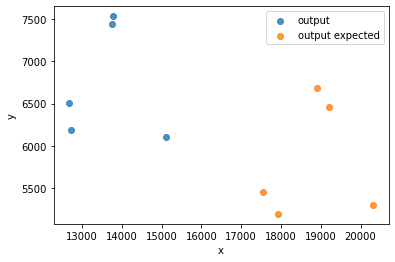

In [13]:
for data, label in [
    (output_point_set, 'output'),
    (output_point_set_expected, 'output expected')
]:
    plt.scatter(data[0,:], data[1,:], label=label, alpha=0.8)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

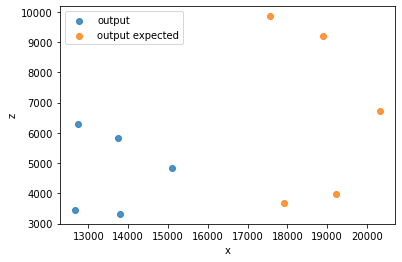

In [14]:
for data, label in [
    (output_point_set, 'output'),
    (output_point_set_expected, 'output expected')
]:
    plt.scatter(data[0,:], data[2,:], label=label, alpha=0.8)
plt.xlabel('x')
plt.ylabel('z')
plt.legend()
plt.show()

**Output point sets don't match exactly, but does it look reasonable?**

### Source Point Set Comparison

Working reversely, we could compute expected source point set using actual output point set.

In [15]:
source_point_set_expected = np.linalg.inv(r_man) @ (output_point_set - t_man)
source_point_set_expected.T

array([[7131.97020666, 5712.14008873, 3049.23045174],
       [4525.42500251, 5345.20228513, 1953.95609359],
       [4919.48648402, 5114.82122631, 4463.06513815],
       [5191.125958  , 6321.37535751, 1829.19390862],
       [5365.82064587, 6216.74723981, 4034.66508583]])

In [16]:
source_point_set.T

array([[12600.5026858 ,  6551.25366322,  4415.        ],
       [10107.81413943,  5875.8009809 ,  1835.1039516 ],
       [10107.81413943,  5875.8009809 ,  7324.8960484 ],
       [10882.7028024 ,  7050.15344716,  2082.09031318],
       [10882.7028024 ,  7050.15344716,  6727.90968682]])

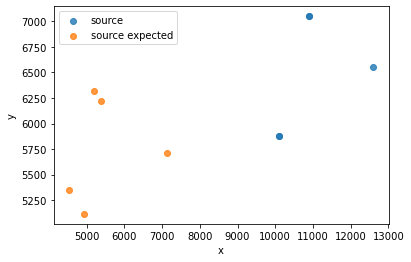

In [17]:
for data, label in [
    (source_point_set, 'source'),
    (source_point_set_expected, 'source expected')
]:
    plt.scatter(data[0,:], data[1,:], label=label, alpha=0.8)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

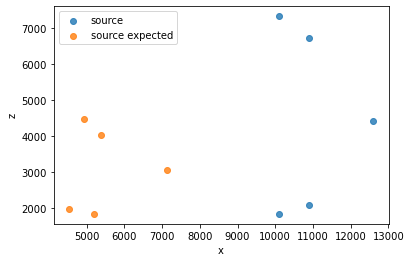

In [18]:
for data, label in [
    (source_point_set, 'source'),
    (source_point_set_expected, 'source expected')
]:
    plt.scatter(data[0,:], data[2,:], label=label, alpha=0.8)
plt.xlabel('x')
plt.ylabel('z')
plt.legend()
plt.show()

**Input point sets don't match exactly, but does it look reasonable?**